# Intro

## Links

Canvas: https://canvas.northwestern.edu/courses/167719/assignments/1078608?module_item_id=2319275



Kaggle: https://www.kaggle.com/c/digit-recognizer

## Modules

In [1]:
#For data manipulation and visualization
#from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import subplots_adjust
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

from datetime import datetime

## Import Data

In [2]:
# #Import data.csv from the Kaggle page linked above
# from google.colab import files
# files.upload()

In [3]:
df = pd.read_csv("train.csv")

# EDA

## Intro Stats

In [4]:
df.shape

(42000, 785)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# check for missing values
print(df.isna().sum().sum())
print(np.isnan(df).sum().sum())
print(df.isnull().sum().sum())

0
0
0


In [7]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


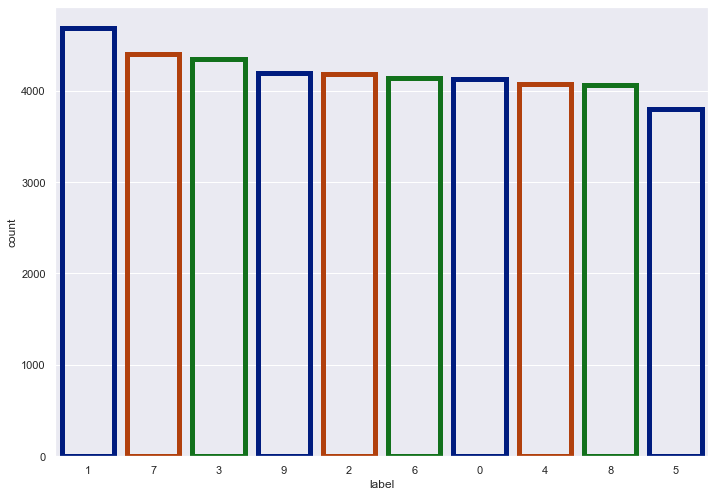

In [8]:
#Setting plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Countplot
ax = sns.countplot(x="label", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3),
                   order = df['label'].value_counts().index)

## Data Prep

In [9]:
y = df['label']
X = df.drop(columns = ['label'])

## Scale Data

In [10]:
# Conversion to float
X = X.astype('float32') 

# Normalization
X = X/255.0

## Flatten Data

https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/

In [11]:
X = X.to_numpy().reshape((len(X), -1))
X.shape

(42000, 784)

## Split Data

In [12]:
# split data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Networks

### Sequential Model

https://hackernoon.com/how-to-perform-mnist-digit-recognition-with-a-multi-layer-neural-network-xn223td8

In [13]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense

#### Model 1: 2 Layers, 50 Nodes

In [14]:
# creating model (2 layers, 50 nodes)
model1 = Sequential()
hidden_layer1 = Dense(50, activation='relu')
model1.add(hidden_layer1)
hidden_layer2 = Dense(50, activation='relu')
model1.add(hidden_layer2)
output_layer=Dense(10, activation='softmax')
model1.add(output_layer)

In [15]:
# compiling the sequential model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# early stopping callback to interrupt training when it measures no progress on the validation set for a number of epochs
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

In [17]:
start = datetime.now()
model1.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping_cb])
end = datetime.now()

Epoch 1/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.3610 - accuracy: 0.8982 - val_loss: 0.1891 - val_accuracy: 0.9448
Epoch 2/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1617 - accuracy: 0.9522 - val_loss: 0.1608 - val_accuracy: 0.9532
Epoch 3/100
1050/1050 [==============================] - 1s 984us/step - loss: 0.1205 - accuracy: 0.9653 - val_loss: 0.1382 - val_accuracy: 0.9602
Epoch 4/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0951 - accuracy: 0.9713 - val_loss: 0.1245 - val_accuracy: 0.9636
Epoch 5/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0793 - accuracy: 0.9749 - val_loss: 0.1185 - val_accuracy: 0.9657
Epoch 6/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0668 - accuracy: 0.9789 - val_loss: 0.1292 - val_accuracy: 0.9613
Epoch 7/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.1155 - val_

In [120]:
start = datetime.now()
model1.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test))
          #callbacks=[early_stopping_cb])
end = datetime.now()

Epoch 1/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.2083 - val_accuracy: 0.9667
Epoch 2/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.2067 - val_accuracy: 0.9649
Epoch 3/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.2039 - val_accuracy: 0.9661
Epoch 4/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.1944 - val_accuracy: 0.9676
Epoch 5/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.2096 - val_accuracy: 0.9651
Epoch 6/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.2578 - val_accuracy: 0.9601
Epoch 7/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.2278 - val_ac

1050/1050 [==============================] - 1s 1ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.3291 - val_accuracy: 0.9665
Epoch 58/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.3247 - val_accuracy: 0.9670
Epoch 59/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.3147 - val_accuracy: 0.9693
Epoch 60/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.3097 - val_accuracy: 0.9668
Epoch 61/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.3399 - val_accuracy: 0.9656
Epoch 62/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.3512 - val_accuracy: 0.9657
Epoch 63/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.3580 - val_accuracy

In [121]:
delta = end-start
print(delta) #0:00:36.952485

0:02:20.414279


In [19]:
train_loss_and_acc = model1.evaluate(X_train, y_train, verbose=2)
print('Training Loss:', train_loss_and_acc[0])
print('Training Accuracy:', train_loss_and_acc[1])

1050/1050 - 1s - loss: 0.0071 - accuracy: 0.9976 - 832ms/epoch - 793us/step
Training Loss: 0.007092489395290613
Training Accuracy: 0.9975595474243164


In [122]:
test_loss_and_acc = model1.evaluate(X_test, y_test, verbose=2)
print('Test Loss:', test_loss_and_acc[0])
print('Test Accuracy:', test_loss_and_acc[1])

# Test Loss: 0.2032758593559265
# Test Accuracy: 0.967380940914154

263/263 - 0s - loss: 0.3795 - accuracy: 0.9694 - 198ms/epoch - 751us/step
Test Loss: 0.37953755259513855
Test Accuracy: 0.9694047570228577


In [21]:
results = pd.DataFrame(columns = ['Model', 'Layers', 'Nodes', 'Time', 'Training Accuracy', 'Testing Accuracy'])

#eval
Model = 'Model 1 (Seq, 2, 50)' 
Layers = 2
Nodes = 50
Time = delta.total_seconds()
Training_Accuracy = train_loss_and_acc[1]
Testing_Accuracy = test_loss_and_acc[1]
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.99756,0.967381


#### Model 2: 2 Layers, 100 Nodes

In [22]:
# creating model (2 layers, 100 nodes)
model2 = Sequential()
hidden_layer1 = Dense(100, activation='relu')
model2.add(hidden_layer1)
hidden_layer2 = Dense(100, activation='relu')
model2.add(hidden_layer2)
output_layer=Dense(10, activation='softmax')
model2.add(output_layer)

In [23]:
# compiling the sequential model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
start = datetime.now()
model2.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping_cb])
end = datetime.now()

Epoch 1/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.3165 - accuracy: 0.9065 - val_loss: 0.1695 - val_accuracy: 0.9499
Epoch 2/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1355 - accuracy: 0.9604 - val_loss: 0.1330 - val_accuracy: 0.9581
Epoch 3/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0945 - accuracy: 0.9707 - val_loss: 0.1407 - val_accuracy: 0.9561
Epoch 4/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0694 - accuracy: 0.9782 - val_loss: 0.1031 - val_accuracy: 0.9680
Epoch 5/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0549 - accuracy: 0.9824 - val_loss: 0.1126 - val_accuracy: 0.9679
Epoch 6/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.1048 - val_accuracy: 0.9698
Epoch 7/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.1193 - val_ac

In [25]:
delta = end-start
print(delta)

0:00:33.675868


In [26]:
train_loss_and_acc = model2.evaluate(X_train, y_train, verbose=2)
print('Training Loss:', train_loss_and_acc[0])
print('Training Accuracy:', train_loss_and_acc[1])

1050/1050 - 1s - loss: 0.0057 - accuracy: 0.9981 - 841ms/epoch - 801us/step
Training Loss: 0.0057073901407420635
Training Accuracy: 0.9980654716491699


In [27]:
test_loss_and_acc = model2.evaluate(X_test, y_test, verbose=2)
print('Test Loss:', test_loss_and_acc[0])
print('Test Accuracy:', test_loss_and_acc[1])

263/263 - 0s - loss: 0.1804 - accuracy: 0.9702 - 201ms/epoch - 763us/step
Test Loss: 0.1804232895374298
Test Accuracy: 0.9702380895614624


In [28]:
#eval
Model = 'Model 2 (Seq, 2, 100)' 
Layers = 2
Nodes = 100
Time = delta.total_seconds()
Training_Accuracy = train_loss_and_acc[1]
Testing_Accuracy = test_loss_and_acc[1]
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238


#### Model 3: 4 Layers, 50 Nodes

In [29]:
# creating model (4 layers, 50 nodes)
model3 = Sequential()
hidden_layer1 = Dense(50, activation='relu')
model3.add(hidden_layer1)
hidden_layer2 = Dense(50, activation='relu')
model3.add(hidden_layer2)
hidden_layer3 = Dense(50, activation='relu')
model3.add(hidden_layer3)
hidden_layer4 = Dense(50, activation='relu')
model3.add(hidden_layer4)
output_layer=Dense(10, activation='softmax')
model3.add(output_layer)

In [30]:
# compiling the sequential model
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
start = datetime.now()
model3.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping_cb])
end = datetime.now()

Epoch 1/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.4000 - accuracy: 0.8721 - val_loss: 0.1992 - val_accuracy: 0.9424
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1624 - accuracy: 0.9498 - val_loss: 0.1584 - val_accuracy: 0.9500
Epoch 3/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1244 - accuracy: 0.9603 - val_loss: 0.1405 - val_accuracy: 0.9595
Epoch 4/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1005 - accuracy: 0.9692 - val_loss: 0.1371 - val_accuracy: 0.9592
Epoch 5/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0837 - accuracy: 0.9746 - val_loss: 0.1557 - val_accuracy: 0.9549
Epoch 6/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0738 - accuracy: 0.9765 - val_loss: 0.1425 - val_accuracy: 0.9574
Epoch 7/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.0645 - accuracy: 0.9791 - val_loss: 0.1315 - val_ac

In [32]:
delta = end-start
print(delta)

0:00:39.674650


In [33]:
train_loss_and_acc = model3.evaluate(X_train, y_train, verbose=2)
print('Training Loss:', train_loss_and_acc[0])
print('Training Accuracy:', train_loss_and_acc[1])

1050/1050 - 1s - loss: 0.0217 - accuracy: 0.9932 - 815ms/epoch - 777us/step
Training Loss: 0.021664045751094818
Training Accuracy: 0.9932143092155457


In [34]:
test_loss_and_acc = model3.evaluate(X_test, y_test, verbose=2)
print('Test Loss:', test_loss_and_acc[0])
print('Test Accuracy:', test_loss_and_acc[1])

263/263 - 0s - loss: 0.2008 - accuracy: 0.9640 - 209ms/epoch - 796us/step
Test Loss: 0.2007841318845749
Test Accuracy: 0.9640476107597351


In [35]:
#eval
Model = 'Model 3 (Seq, 4, 50)' 
Layers = 4
Nodes = 50
Time = delta.total_seconds()
Training_Accuracy = train_loss_and_acc[1]
Testing_Accuracy = test_loss_and_acc[1]
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048


#### Model 4: 4 Layers, 100 Nodes

In [36]:
# creating model (4 layers, 100 nodes)
model4 = Sequential()
hidden_layer1 = Dense(100, activation='relu')
model4.add(hidden_layer1)
hidden_layer2 = Dense(100, activation='relu')
model4.add(hidden_layer2)
hidden_layer3 = Dense(100, activation='relu')
model4.add(hidden_layer3)
hidden_layer4 = Dense(100, activation='relu')
model4.add(hidden_layer4)
output_layer=Dense(10, activation='softmax')
model4.add(output_layer)

In [37]:
# compiling the sequential model
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
start = datetime.now()
model4.fit(X_train, y_train, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping_cb])
end = datetime.now()

Epoch 1/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.9024 - val_loss: 0.1656 - val_accuracy: 0.9514
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1343 - accuracy: 0.9580 - val_loss: 0.1509 - val_accuracy: 0.9540
Epoch 3/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0978 - accuracy: 0.9690 - val_loss: 0.1222 - val_accuracy: 0.9637
Epoch 4/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0754 - accuracy: 0.9757 - val_loss: 0.1206 - val_accuracy: 0.9658
Epoch 5/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0600 - accuracy: 0.9809 - val_loss: 0.1455 - val_accuracy: 0.9614
Epoch 6/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.1004 - val_accuracy: 0.9719
Epoch 7/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.1149 - val_ac

In [39]:
delta = end-start
print(delta)

0:00:41.149301


In [40]:
train_loss_and_acc = model4.evaluate(X_train, y_train, verbose=2)
print('Training Loss:', train_loss_and_acc[0])
print('Training Accuracy:', train_loss_and_acc[1])

1050/1050 - 1s - loss: 0.0118 - accuracy: 0.9964 - 894ms/epoch - 851us/step
Training Loss: 0.011782404035329819
Training Accuracy: 0.9963988065719604


In [41]:
test_loss_and_acc = model4.evaluate(X_test, y_test, verbose=2)
print('Test Loss:', test_loss_and_acc[0])
print('Test Accuracy:', test_loss_and_acc[1])

263/263 - 0s - loss: 0.1599 - accuracy: 0.9715 - 219ms/epoch - 834us/step
Test Loss: 0.15993531048297882
Test Accuracy: 0.9715476036071777


In [42]:
#eval
Model = 'Model 4 (Seq, 4, 100)' 
Layers = 4
Nodes = 100
Time = delta.total_seconds()
Training_Accuracy = train_loss_and_acc[1]
Testing_Accuracy = test_loss_and_acc[1]
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548


## MLP Classfier Model

In [43]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.neural_network import MLPClassifier
layer_sizes_10x1 = (10,)
layer_sizes_50x1 = (50,)
layer_sizes_100x1 = (100,)
layer_sizes_10x3 = (10,10,10)
layer_sizes_50x3 = (50,50,50)
layer_sizes_100x3 = (100,100,100)
layer_sizes_10x5 = (10,10,10,10,10)
layer_sizes_50x5 = (50,50,50,50,50)
layer_sizes_100x5 = (100,100,100,100,100)

### 1 Layer

#### 10 Nodes

In [45]:
mlp1 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_10x1,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

start = datetime.now()              
mlp1.fit(X_train, y_train)
end = datetime.now()
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 0.46799789
Iteration 2, loss = 0.28337209
Iteration 3, loss = 0.26004510
Iteration 4, loss = 0.24543112
Iteration 5, loss = 0.23922180
Iteration 6, loss = 0.23108309
Iteration 7, loss = 0.23014608
Iteration 8, loss = 0.21869644
Iteration 9, loss = 0.21827797
Iteration 10, loss = 0.21678182
Iteration 11, loss = 0.21008014
Iteration 12, loss = 0.20553513
Iteration 13, loss = 0.20457491
Iteration 14, loss = 0.19738307
Iteration 15, loss = 0.19873571
Iteration 16, loss = 0.19578736
Iteration 17, loss = 0.19436931
Iteration 18, loss = 0.19221754
Iteration 19, loss = 0.18757736
Iteration 20, loss = 0.18641514
Iteration 21, loss = 0.18723098
Iteration 22, loss = 0.18257645
Iteration 23, loss = 0.18053602
Iteration 24, loss = 0.18286422
Iteration 25, loss = 0.17846300
Iteration 26, loss = 0.17725075
Iteration 27, loss = 0.17867561
Iteration 28, loss = 0.17128354
Iteration 29, loss = 0.17497341
Iteration 30, loss = 0.16668537
Iteration 31, loss = 0.17080538
Iteration 32, los

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [46]:
delta = end-start
print(delta)

0:00:18.248337


In [47]:
mlp1_test_pred = mlp1.score(X_test, y_test)
mlp1_train_pred = mlp1.score(X_train, y_train)

In [48]:
#eval
Model = 'Model 5 (MLP, 1, 10)' 
Layers = 1
Nodes = 10
Time = delta.total_seconds()
Training_Accuracy = mlp1_test_pred
Testing_Accuracy = mlp1_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786


#### 50 Nodes

In [49]:
mlp2 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_50x1,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

start = datetime.now()              
mlp2.fit(X_train, y_train)
end = datetime.now()              

print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.33812117
Iteration 2, loss = 0.13744666
Iteration 3, loss = 0.10501313
Iteration 4, loss = 0.08500181
Iteration 5, loss = 0.06995283
Iteration 6, loss = 0.06114768
Iteration 7, loss = 0.05183904
Iteration 8, loss = 0.04595707
Iteration 9, loss = 0.03593902
Iteration 10, loss = 0.03226649
Iteration 11, loss = 0.02851820
Iteration 12, loss = 0.02372226
Iteration 13, loss = 0.02137845
Iteration 14, loss = 0.01935074
Iteration 15, loss = 0.01543476
Iteration 16, loss = 0.01155923
Iteration 17, loss = 0.01227434
Iteration 18, loss = 0.00864990
Iteration 19, loss = 0.00715568
Iteration 20, loss = 0.00479896
Iteration 21, loss = 0.00317698
Iteration 22, loss = 0.00211373
Iteration 23, loss = 0.00177557
Iteration 24, loss = 0.00151011
Iteration 25, loss = 0.00139539
Iteration 26, loss = 0.00129437
Iteration 27, loss = 0.00125639
Iteration 28, loss = 0.00119228
Iteration 29, loss = 0.00114205
Iteration 30, loss = 0.00110769
Iteration 31, loss = 0.00105695
Iteration 32, los

In [50]:
delta = end-start
print(delta)

0:00:11.281538


In [51]:
mlp2_test_pred = mlp2.score(X_test, y_test)
mlp2_train_pred = mlp2.score(X_train, y_train)

In [52]:
#eval
Model = 'Model 6 (MLP, 1, 50)' 
Layers = 1
Nodes = 50
Time = delta.total_seconds()
Training_Accuracy = mlp2_test_pred
Testing_Accuracy = mlp2_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000


#### 100 Nodes

In [53]:
mlp3 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_100x1,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

start = datetime.now()              
mlp3.fit(X_train, y_train)
end = datetime.now()              


print("Training set score: %f" % mlp3.score(X_train, y_train))
print("Test set score: %f" % mlp3.score(X_test, y_test))

Iteration 1, loss = 0.32167365
Iteration 2, loss = 0.12200411
Iteration 3, loss = 0.08494004
Iteration 4, loss = 0.06455943
Iteration 5, loss = 0.04928552
Iteration 6, loss = 0.03773648
Iteration 7, loss = 0.03102117
Iteration 8, loss = 0.02460724
Iteration 9, loss = 0.01995751
Iteration 10, loss = 0.01349303
Iteration 11, loss = 0.01251578
Iteration 12, loss = 0.00956929
Iteration 13, loss = 0.00542790
Iteration 14, loss = 0.00443356
Iteration 15, loss = 0.00293126
Iteration 16, loss = 0.00219065
Iteration 17, loss = 0.00186604
Iteration 18, loss = 0.00166548
Iteration 19, loss = 0.00151996
Iteration 20, loss = 0.00141091
Iteration 21, loss = 0.00134208
Iteration 22, loss = 0.00129608
Iteration 23, loss = 0.00118608
Iteration 24, loss = 0.00112978
Iteration 25, loss = 0.00109271
Iteration 26, loss = 0.00104337
Iteration 27, loss = 0.00100573
Iteration 28, loss = 0.00097580
Iteration 29, loss = 0.00095161
Iteration 30, loss = 0.00091180
Iteration 31, loss = 0.00089629
Iteration 32, los

In [54]:
delta = end-start
print(delta)

0:00:15.372456


In [55]:
mlp3_test_pred = mlp3.score(X_test, y_test)
mlp3_train_pred = mlp3.score(X_train, y_train)

In [56]:
#eval
Model = 'Model 7 (MLP, 1, 100)' 
Layers = 1
Nodes = 100
Time = delta.total_seconds()
Training_Accuracy = mlp3_test_pred
Testing_Accuracy = mlp3_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000


### 3 Layers

#### 10 Nodes

In [57]:
mlp4 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_10x3,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

start = datetime.now()              
mlp4.fit(X_train, y_train)
end = datetime.now() 

print("Training set score: %f" % mlp4.score(X_train, y_train))
print("Test set score: %f" % mlp4.score(X_test, y_test))

Iteration 1, loss = 0.95200348
Iteration 2, loss = 0.49537485
Iteration 3, loss = 0.42375075
Iteration 4, loss = 0.36630830
Iteration 5, loss = 0.34513270
Iteration 6, loss = 0.32719876
Iteration 7, loss = 0.31331080
Iteration 8, loss = 0.31718798
Iteration 9, loss = 0.30375754
Iteration 10, loss = 0.29615480
Iteration 11, loss = 0.29065328
Iteration 12, loss = 0.28912365
Iteration 13, loss = 0.28349875
Iteration 14, loss = 0.28413518
Iteration 15, loss = 0.27920261
Iteration 16, loss = 0.27726201
Iteration 17, loss = 0.26929211
Iteration 18, loss = 0.27078912
Iteration 19, loss = 0.26838341
Iteration 20, loss = 0.26876391
Iteration 21, loss = 0.26670843
Iteration 22, loss = 0.26207022
Iteration 23, loss = 0.26472387
Iteration 24, loss = 0.25967084
Iteration 25, loss = 0.25990658
Iteration 26, loss = 0.26050995
Iteration 27, loss = 0.25320391
Iteration 28, loss = 0.25541233
Iteration 29, loss = 0.25730853
Iteration 30, loss = 0.25246449
Iteration 31, loss = 0.24903140
Iteration 32, los

In [58]:
delta = end-start
print(delta)

0:00:19.170453


In [59]:
mlp4_test_pred = mlp4.score(X_test, y_test)
mlp4_train_pred = mlp4.score(X_train, y_train)

In [60]:
#eval
Model = 'Model 8 (MLP, 3, 10)' 
Layers = 3
Nodes = 10
Time = delta.total_seconds()
Training_Accuracy = mlp4_test_pred
Testing_Accuracy = mlp4_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000
7,"Model 8 (MLP, 3, 10)",3,10,19.170453,0.922619,0.948423


#### 50 Nodes

In [61]:
mlp5 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_50x3,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)

start = datetime.now()              
mlp5.fit(X_train, y_train)
end = datetime.now()               

print("Training set score: %f" % mlp5.score(X_train, y_train))
print("Test set score: %f" % mlp5.score(X_test, y_test))

Iteration 1, loss = 0.45871904
Iteration 2, loss = 0.17437994
Iteration 3, loss = 0.14009937
Iteration 4, loss = 0.12222580
Iteration 5, loss = 0.10187893
Iteration 6, loss = 0.09147139
Iteration 7, loss = 0.08225719
Iteration 8, loss = 0.07842556
Iteration 9, loss = 0.07434273
Iteration 10, loss = 0.06572201
Iteration 11, loss = 0.06337553
Iteration 12, loss = 0.06245802
Iteration 13, loss = 0.06310806
Iteration 14, loss = 0.05442029
Iteration 15, loss = 0.05853271
Iteration 16, loss = 0.04964991
Iteration 17, loss = 0.04539171
Iteration 18, loss = 0.04298113
Iteration 19, loss = 0.05096939
Iteration 20, loss = 0.04377763
Iteration 21, loss = 0.04091264
Iteration 22, loss = 0.04343825
Iteration 23, loss = 0.04497801
Iteration 24, loss = 0.04454707
Iteration 25, loss = 0.04035827
Iteration 26, loss = 0.04309277
Iteration 27, loss = 0.04109823
Iteration 28, loss = 0.04410669
Iteration 29, loss = 0.04623591
Iteration 30, loss = 0.04106406
Iteration 31, loss = 0.04423567
Iteration 32, los

In [62]:
delta = end-start
print(delta)

0:00:18.911334


In [63]:
mlp5_test_pred = mlp5.score(X_test, y_test)
mlp5_train_pred = mlp5.score(X_train, y_train)

In [64]:
#eval
Model = 'Model 9 (MLP, 3, 50)' 
Layers = 3
Nodes = 50
Time = delta.total_seconds()
Training_Accuracy = mlp5_test_pred
Testing_Accuracy = mlp5_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000
7,"Model 8 (MLP, 3, 10)",3,10,19.170453,0.922619,0.948423
8,"Model 9 (MLP, 3, 50)",3,50,18.911334,0.966905,0.993452


#### 100 Nodes

In [65]:
mlp6 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_100x3,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)
              
start = datetime.now()              
mlp6.fit(X_train, y_train)
end = datetime.now()   

print("Training set score: %f" % mlp6.score(X_train, y_train))
print("Test set score: %f" % mlp6.score(X_test, y_test))

Iteration 1, loss = 0.52164476
Iteration 2, loss = 0.16402378
Iteration 3, loss = 0.12330468
Iteration 4, loss = 0.10269050
Iteration 5, loss = 0.08547243
Iteration 6, loss = 0.07110801
Iteration 7, loss = 0.06503341
Iteration 8, loss = 0.06123416
Iteration 9, loss = 0.05784609
Iteration 10, loss = 0.04944880
Iteration 11, loss = 0.05467753
Iteration 12, loss = 0.04675435
Iteration 13, loss = 0.03782403
Iteration 14, loss = 0.03772119
Iteration 15, loss = 0.03686301
Iteration 16, loss = 0.03476929
Iteration 17, loss = 0.03707047
Iteration 18, loss = 0.03141235
Iteration 19, loss = 0.02953099
Iteration 20, loss = 0.02785696
Iteration 21, loss = 0.02868018
Iteration 22, loss = 0.03017021
Iteration 23, loss = 0.02582090
Iteration 24, loss = 0.02934057
Iteration 25, loss = 0.03017075
Iteration 26, loss = 0.03563241
Iteration 27, loss = 0.02531422
Iteration 28, loss = 0.03070848
Iteration 29, loss = 0.01830584
Iteration 30, loss = 0.02320620
Iteration 31, loss = 0.01657743
Iteration 32, los

In [66]:
delta = end-start
print(delta)

0:00:44.649760


In [67]:
mlp6_test_pred = mlp6.score(X_test, y_test)
mlp6_train_pred = mlp6.score(X_train, y_train)

In [68]:
#eval
Model = 'Model 10 (MLP, 3, 100)' 
Layers = 3
Nodes = 100
Time = delta.total_seconds()
Training_Accuracy = mlp6_test_pred
Testing_Accuracy = mlp6_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000
7,"Model 8 (MLP, 3, 10)",3,10,19.170453,0.922619,0.948423
8,"Model 9 (MLP, 3, 50)",3,50,18.911334,0.966905,0.993452
9,"Model 10 (MLP, 3, 100)",3,100,44.649760,0.967738,0.997113


### 5 Layers

#### 10 Nodes

In [69]:
mlp7 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_10x5,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)
              
start = datetime.now()              
mlp7.fit(X_train, y_train)
end = datetime.now() 

print("Training set score: %f" % mlp7.score(X_train, y_train))
print("Test set score: %f" % mlp7.score(X_test, y_test))

Iteration 1, loss = 1.65926315
Iteration 2, loss = 2.18176474
Iteration 3, loss = 2.29935690
Iteration 4, loss = 2.30176772
Iteration 5, loss = 2.30245862
Iteration 6, loss = 2.30233233
Iteration 7, loss = 2.30212881
Iteration 8, loss = 2.30174824
Iteration 9, loss = 2.30194928
Iteration 10, loss = 2.30217997
Iteration 11, loss = 2.30183751
Iteration 12, loss = 2.30174213
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.113304
Test set score: 0.109405


In [70]:
delta = end-start
print(delta)

0:00:02.983746


In [71]:
mlp7_test_pred = mlp7.score(X_test, y_test)
mlp7_train_pred = mlp7.score(X_train, y_train)

In [72]:
#eval
Model = 'Model 11 (MLP, 5, 10)' 
Layers = 5
Nodes = 10
Time = delta.total_seconds()
Training_Accuracy = mlp7_test_pred
Testing_Accuracy = mlp7_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000
7,"Model 8 (MLP, 3, 10)",3,10,19.170453,0.922619,0.948423
8,"Model 9 (MLP, 3, 50)",3,50,18.911334,0.966905,0.993452
9,"Model 10 (MLP, 3, 100)",3,100,44.649760,0.967738,0.997113


#### 50 Nodes

In [73]:
mlp8 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_50x5,
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)
              
start = datetime.now()              
mlp8.fit(X_train, y_train)
end = datetime.now() 

print("Training set score: %f" % mlp8.score(X_train, y_train))
print("Test set score: %f" % mlp8.score(X_test, y_test))

Iteration 1, loss = 1.33298166
Iteration 2, loss = 0.56228986
Iteration 3, loss = 0.37054011
Iteration 4, loss = 0.30428159
Iteration 5, loss = 0.27811590
Iteration 6, loss = 0.25683773
Iteration 7, loss = 0.24304994
Iteration 8, loss = 0.23908765
Iteration 9, loss = 0.22275476
Iteration 10, loss = 0.21691503
Iteration 11, loss = 0.20732844
Iteration 12, loss = 0.20797553
Iteration 13, loss = 0.19814034
Iteration 14, loss = 0.20593115
Iteration 15, loss = 0.18688355
Iteration 16, loss = 0.18373304
Iteration 17, loss = 0.18307489
Iteration 18, loss = 0.18259575
Iteration 19, loss = 0.17538491
Iteration 20, loss = 0.16984887
Iteration 21, loss = 0.16828121
Iteration 22, loss = 0.16565114
Iteration 23, loss = 0.16180297
Iteration 24, loss = 0.16187776
Iteration 25, loss = 0.15270026
Iteration 26, loss = 0.14888043
Iteration 27, loss = 0.15526094
Iteration 28, loss = 0.15593925
Iteration 29, loss = 0.14624261
Iteration 30, loss = 0.16611589
Iteration 31, loss = 1583758.33619908
Iteration 3

In [74]:
delta = end-start
print(delta)

0:00:19.574841


In [75]:
mlp8_test_pred = mlp8.score(X_test, y_test)
mlp8_train_pred = mlp8.score(X_train, y_train)

In [76]:
#eval
Model = 'Model 12 (MLP, 5, 50)' 
Layers = 5
Nodes = 50
Time = delta.total_seconds()
Training_Accuracy = mlp8_test_pred
Testing_Accuracy = mlp8_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000
7,"Model 8 (MLP, 3, 10)",3,10,19.170453,0.922619,0.948423
8,"Model 9 (MLP, 3, 50)",3,50,18.911334,0.966905,0.993452
9,"Model 10 (MLP, 3, 100)",3,100,44.649760,0.967738,0.997113


#### 100 Nodes

In [77]:
mlp9 = MLPClassifier(
    hidden_layer_sizes=layer_sizes_100x5,
    max_iter=65,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=42,
    learning_rate_init=0.2,
)
              
start = datetime.now()              
mlp9.fit(X_train, y_train)
end = datetime.now() 

print("Training set score: %f" % mlp9.score(X_train, y_train))
print("Test set score: %f" % mlp9.score(X_test, y_test))

Iteration 1, loss = 0.81648253
Iteration 2, loss = 0.21923203
Iteration 3, loss = 0.16311275
Iteration 4, loss = 0.13162621
Iteration 5, loss = 0.11535752
Iteration 6, loss = 0.09349293
Iteration 7, loss = 0.08865608
Iteration 8, loss = 0.08041453
Iteration 9, loss = 0.06911561
Iteration 10, loss = 0.06949015
Iteration 11, loss = 0.05939087
Iteration 12, loss = 0.06019510
Iteration 13, loss = 0.05525488
Iteration 14, loss = 0.05353015
Iteration 15, loss = 0.04777815
Iteration 16, loss = 0.04135481
Iteration 17, loss = 0.04212481
Iteration 18, loss = 0.03968593
Iteration 19, loss = 0.03838957
Iteration 20, loss = 0.03899387
Iteration 21, loss = 0.03745069
Iteration 22, loss = 0.03796576
Iteration 23, loss = 0.03380817
Iteration 24, loss = 0.03332531
Iteration 25, loss = 0.03562480
Iteration 26, loss = 0.03022161
Iteration 27, loss = 0.03203888
Iteration 28, loss = 0.02593825
Iteration 29, loss = 0.03003061
Iteration 30, loss = 0.02810734
Iteration 31, loss = 0.02606915
Iteration 32, los

C:\Users\sjue\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (65) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.995863
Test set score: 0.968333


In [78]:
delta = end-start
print(delta)

0:00:56.609293


In [79]:
mlp9_test_pred = mlp9.score(X_test, y_test)
mlp9_train_pred = mlp9.score(X_train, y_train)

## Model Results Table

In [80]:
#eval
Model = 'Model 13 (MLP, 5, 100)' 
Layers = 5
Nodes = 100
Time = delta.total_seconds()
Training_Accuracy = mlp9_test_pred
Testing_Accuracy = mlp9_train_pred
row = [Model, Layers, Nodes, Time, Training_Accuracy, Testing_Accuracy]
results = results.append(pd.DataFrame([row], columns=results.columns), ignore_index=True)
results

,Model,Layers,Nodes,Time,Training Accuracy,Testing Accuracy
0,"Model 1 (Seq, 2, 50)",2,50,36.952485,0.997560,0.967381
1,"Model 2 (Seq, 2, 100)",2,100,33.675868,0.998065,0.970238
2,"Model 3 (Seq, 4, 50)",4,50,39.674650,0.993214,0.964048
3,"Model 4 (Seq, 4, 100)",4,100,41.149301,0.996399,0.971548
4,"Model 5 (MLP, 1, 10)",1,10,18.248337,0.926071,0.961786
5,"Model 6 (MLP, 1, 50)",1,50,11.281538,0.970476,1.000000
6,"Model 7 (MLP, 1, 100)",1,100,15.372456,0.973690,1.000000
7,"Model 8 (MLP, 3, 10)",3,10,19.170453,0.922619,0.948423
8,"Model 9 (MLP, 3, 50)",3,50,18.911334,0.966905,0.993452
9,"Model 10 (MLP, 3, 100)",3,100,44.649760,0.967738,0.997113


## Predictions

In [81]:
# Predicting the number labels

# sequential model 1
seq1_y_pred = model1.predict(X_test)
seq1_y_pred = np.argmax(seq1_y_pred, axis=1) # Here we get the index of maximum value in the encoded vector

# sequential model 2
seq2_y_pred = model2.predict(X_test)
seq2_y_pred = np.argmax(seq2_y_pred, axis=1)
# sequential model 3
seq3_y_pred = model3.predict(X_test)
seq3_y_pred = np.argmax(seq3_y_pred, axis=1)

# sequential model 4
seq4_y_pred = model4.predict(X_test)
seq4_y_pred = np.argmax(seq4_y_pred, axis=1)

263/263 [==============================] - 0s 742us/step


In [82]:
mlp1_test_pred = mlp1.predict(X_test)
mlp1_train_pred = mlp1.predict(X_train)

In [83]:
mlp2_test_pred = mlp2.predict(X_test)
mlp2_train_pred = mlp2.predict(X_train)

In [84]:
mlp3_test_pred = mlp3.predict(X_test)
mlp3_train_pred = mlp3.predict(X_train)

In [85]:
mlp4_test_pred = mlp4.predict(X_test)
mlp4_train_pred = mlp4.predict(X_train)

In [86]:
mlp5_test_pred = mlp5.predict(X_test)
mlp5_train_pred = mlp5.predict(X_train)

In [87]:
mlp6_test_pred = mlp6.predict(X_test)
mlp6_train_pred = mlp6.predict(X_train)

In [88]:
mlp7_test_pred = mlp7.predict(X_test)
mlp7_train_pred = mlp7.predict(X_train)

In [89]:
mlp8_test_pred = mlp8.predict(X_test)
mlp8_train_pred = mlp8.predict(X_train)

In [90]:
mlp9_test_pred = mlp9.predict(X_test)
mlp9_train_pred = mlp9.predict(X_train)

## Confusion Matrices

### Sequential Models

#### 2 Layers, 50 Nodes

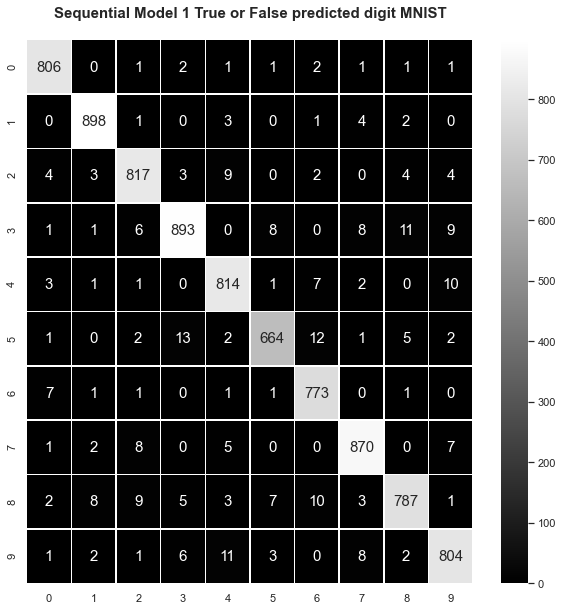

In [91]:
#Confusion matrix for sequential model 1
con_mat=confusion_matrix(y_test, seq1_y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Sequential Model 1 True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#### 2 layers, 100 Nodes

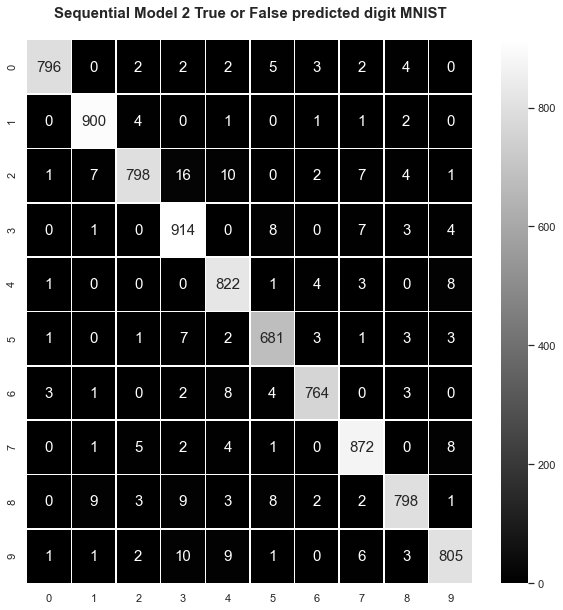

In [92]:
#Confusion matrix for sequential model 2
con_mat=confusion_matrix(y_test, seq2_y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Sequential Model 2 True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#### 4 Layers, 50 Nodes

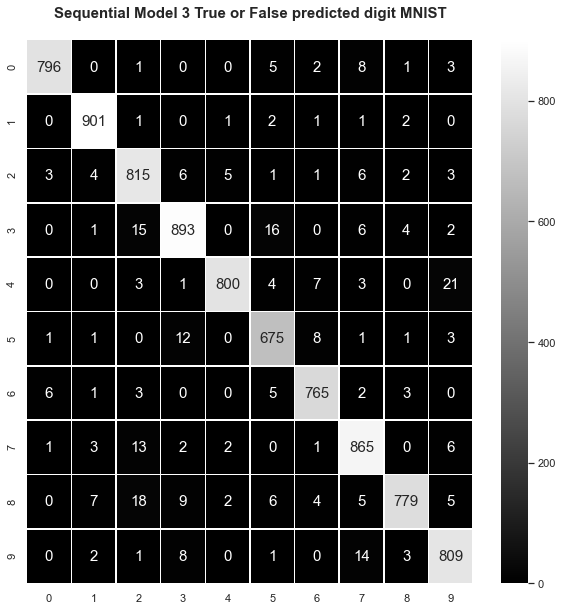

In [93]:
#Confusion matrix for sequential model 3
con_mat=confusion_matrix(y_test, seq3_y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Sequential Model 3 True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

#### 4 Layers, 100 Nodes

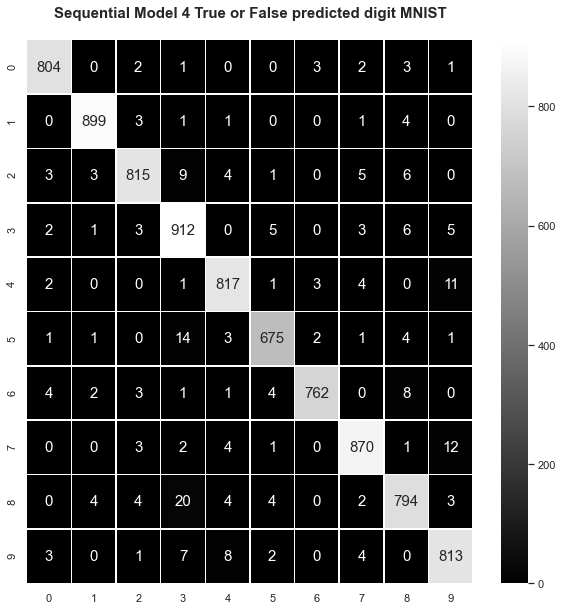

In [94]:
#Confusion matrix for sequential model 4
con_mat=confusion_matrix(y_test, seq4_y_pred)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Sequential Model 4 True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

### MLP Classifier Models

### 1 Layer

#### 10 Nodes

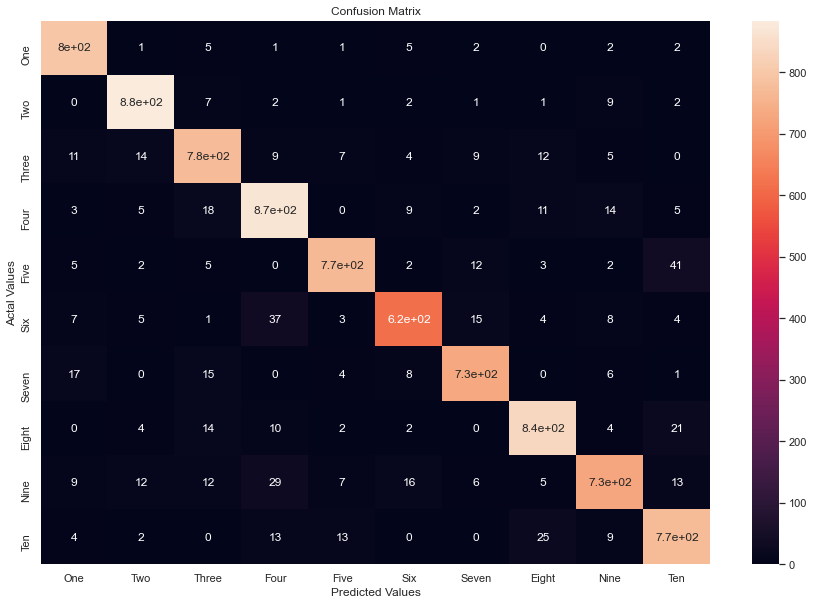

In [95]:
cm1 = confusion_matrix(y_test, mlp1_test_pred)

cm1_df = pd.DataFrame(cm1,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm1_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 50 Nodes

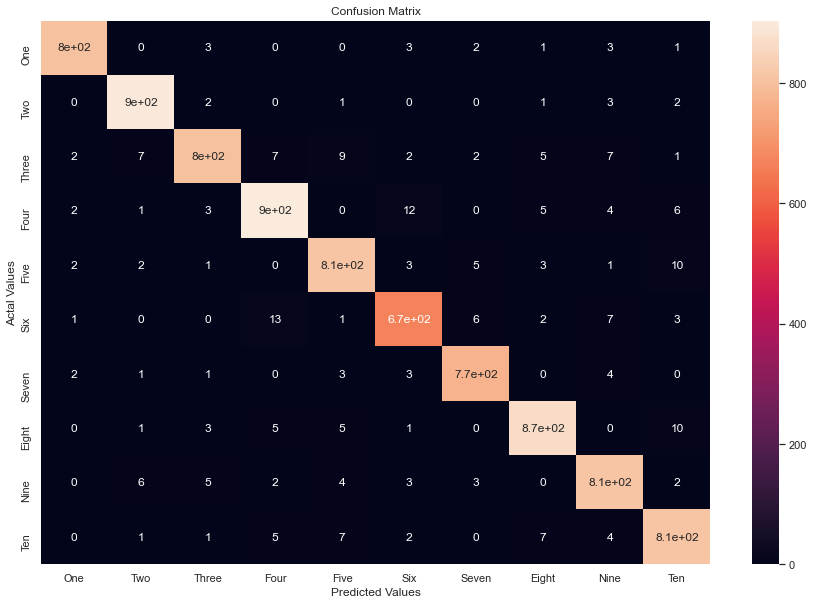

In [96]:
cm2 = confusion_matrix(y_test, mlp2_test_pred)

cm2_df = pd.DataFrame(cm2,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm2_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 100 Nodes

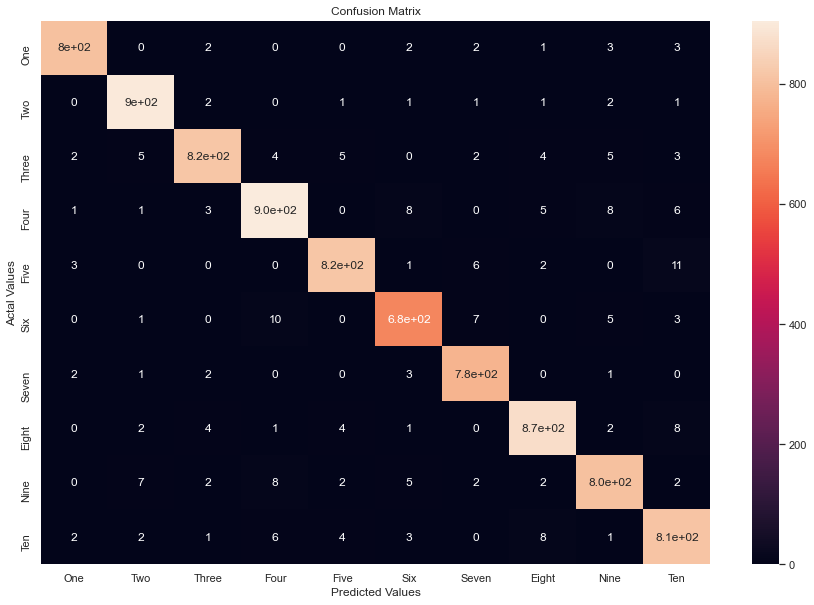

In [97]:
cm3 = confusion_matrix(y_test, mlp3_test_pred)

cm3_df = pd.DataFrame(cm3,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm3_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### 3 Layers

#### 10 Nodes

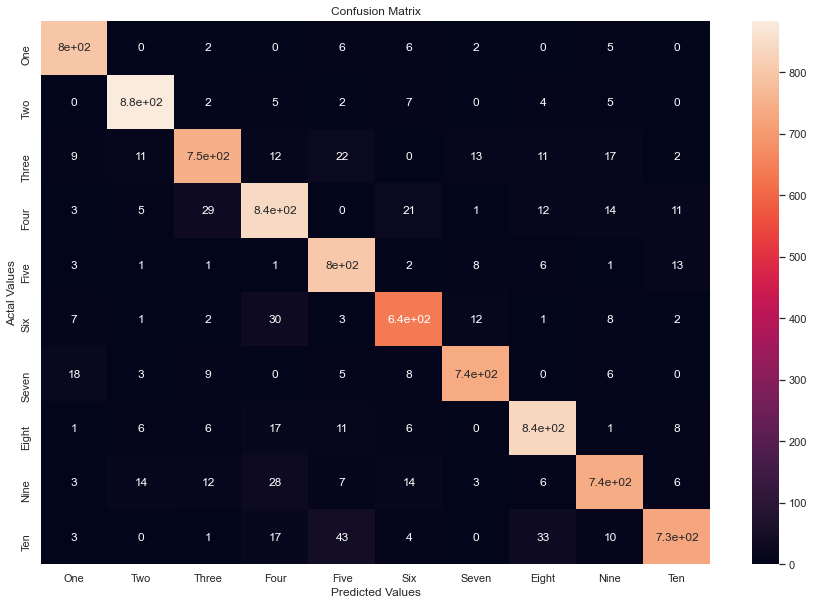

In [98]:
cm4 = confusion_matrix(y_test, mlp4_test_pred)

cm4_df = pd.DataFrame(cm4,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm4_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 50 Nodes

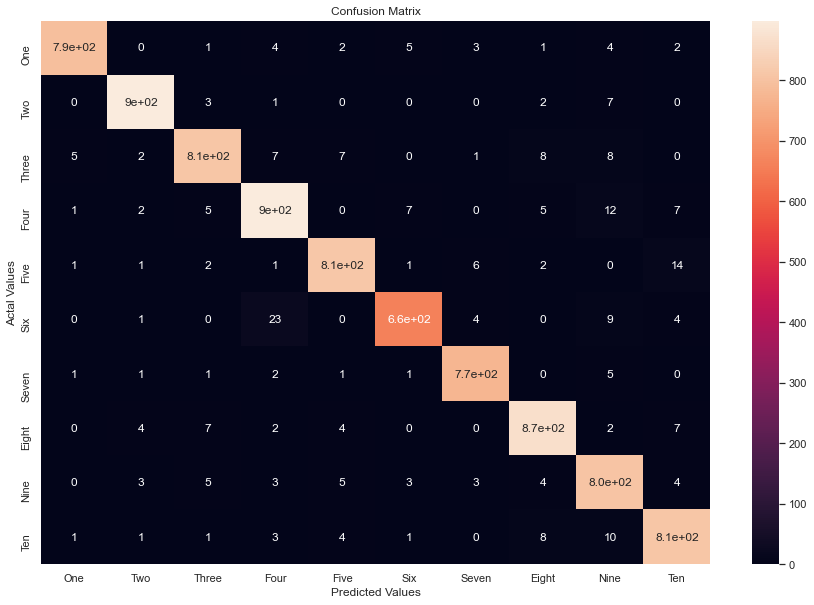

In [99]:
cm5 = confusion_matrix(y_test, mlp5_test_pred)

cm5_df = pd.DataFrame(cm5,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm5_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 100 Nodes

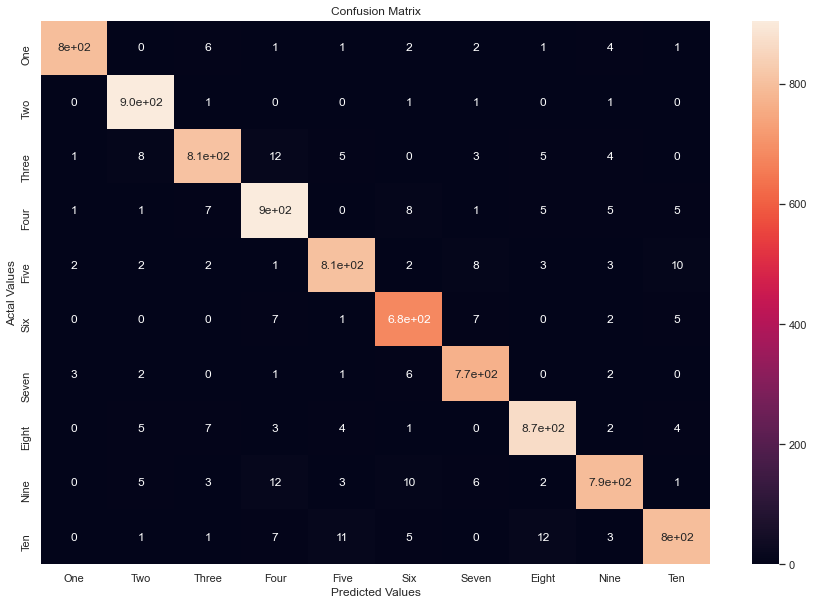

In [100]:
cm6 = confusion_matrix(y_test, mlp6_test_pred)

cm6_df = pd.DataFrame(cm6,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm6_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### 5 Layers

#### 10 Nodes

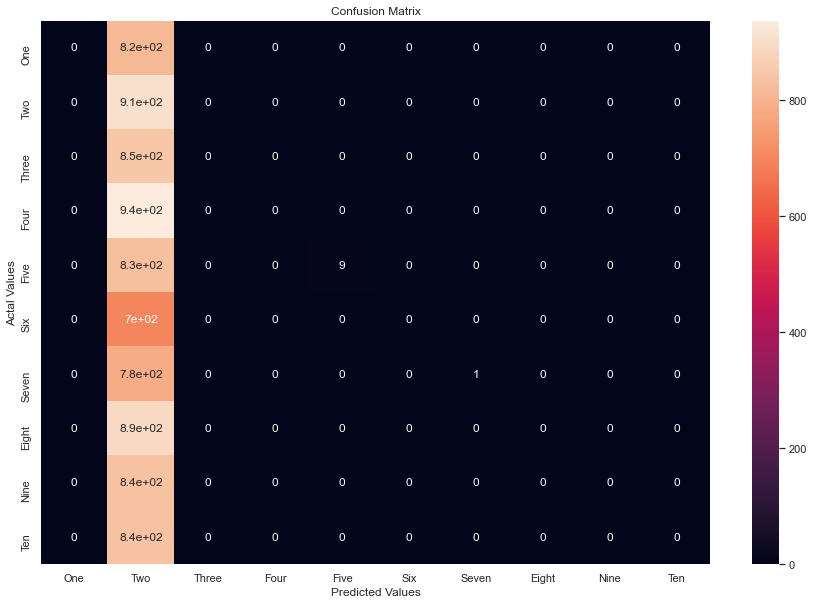

In [101]:
cm7 = confusion_matrix(y_test, mlp7_test_pred)

cm7_df = pd.DataFrame(cm7,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm7_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 50 Nodes

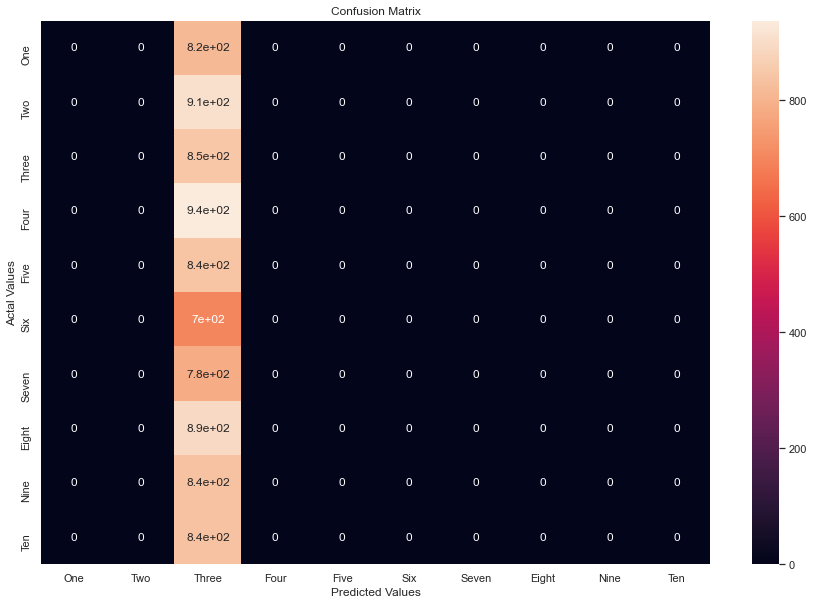

In [102]:
cm8 = confusion_matrix(y_test, mlp8_test_pred)

cm8_df = pd.DataFrame(cm8,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm8_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#### 100 Nodes

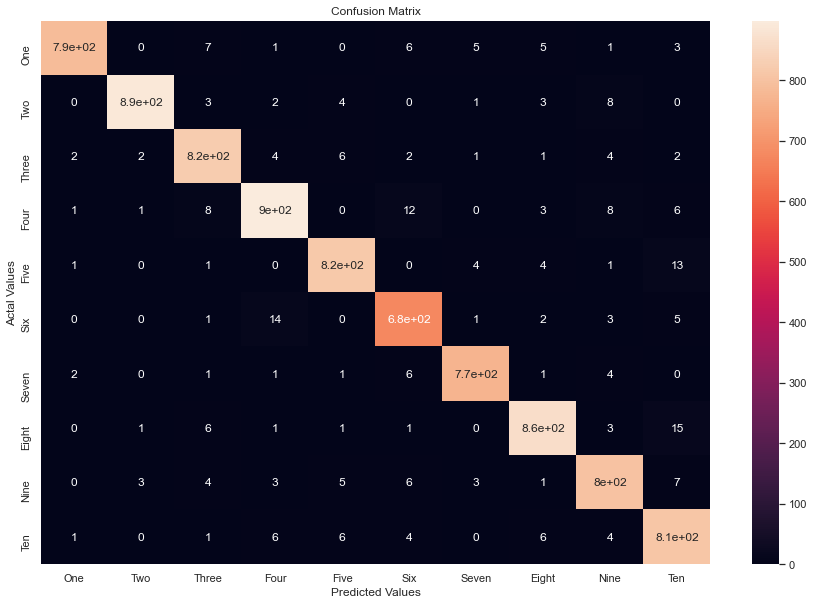

In [103]:
cm9 = confusion_matrix(y_test, mlp9_test_pred)

cm9_df = pd.DataFrame(cm9,
                     index = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'], 
                     columns = ['One','Two','Three','Four','Five','Six','Seven','Eight','Nine','Ten'])

#Plotting the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm9_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Testing for Kaggle Submisson

In [104]:
#create dataframe using test data from kaggle
df_test = pd.read_csv("test.csv")

In [105]:
len(df_test)

28000

## Scale Data

In [106]:
# Conversion to float
df_float = df_test.astype('float32')

# Normalization
X = df_float/255.0

X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Flatten Data

In [107]:
X = X.to_numpy().reshape((len(X), -1))
X.shape

(28000, 784)

## Test Models

In [108]:
# Sequential Model 2
seq2_pred = model2.predict(X)
seq2_pred = np.argmax(seq2_pred, axis=1)
seq2_pred = pd.DataFrame(seq2_pred ,columns = ['Label'])
seq2_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

seq2_pred.head()

875/875 [==============================] - 1s 720us/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [109]:
# Sequential Model 4
seq4_pred = model4.predict(X)
seq4_pred = np.argmax(seq4_pred, axis=1)
seq4_pred = pd.DataFrame(seq4_pred ,columns = ['Label'])
seq4_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

seq4_pred.head()

875/875 [==============================] - 1s 797us/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [110]:
# Model 7 (MLP model 3)
mlp3_pred = pd.DataFrame(mlp3.predict(X), columns = ['Label'])
mlp3_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

mlp3_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [111]:
# Model 10 (MLP model 6)
mlp6_pred = pd.DataFrame(mlp6.predict(X), columns = ['Label'])
mlp6_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

mlp6_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [112]:
# Model 12 (MLP model 9)
mlp9_pred = pd.DataFrame(mlp9.predict(X), columns = ['Label'])
mlp9_pred.insert(0, 'ImageId', range(1, 1 + len(X)))

mlp9_pred.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Download the Files

Leave these commented out unless downloading a final version.

In [113]:
# seq2_pred.to_csv('seq2_pred-group_5_msds_422.csv', index=False)
# files.download('seq2_pred-group_5_msds_422.csv')

In [114]:
# seq4_pred.to_csv('seq4_pred-group_5_msds_422.csv', index=False)
# files.download('seq4_pred-group_5_msds_422.csv')

In [115]:
# mlp3_pred.to_csv('mlp3_pred-group_5_msds_422.csv', index=False)
# files.download('mlp3_pred-group_5_msds_422.csv')

In [116]:
# mlp6_pred.to_csv('mlp6_pred-group_5_msds_422.csv', index=False)
# files.download('mlp6_pred-group_5_msds_422.csv')

In [117]:
# mlp9_pred.to_csv('mlp9_pred-group_5_msds_422.csv', index=False)
# files.download('mlp9_pred-group_5_msds_422.csv')

In [118]:
# %%capture
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('Module7_Assignment_1.ipynb')